Below you see a SUDOKU variant.
 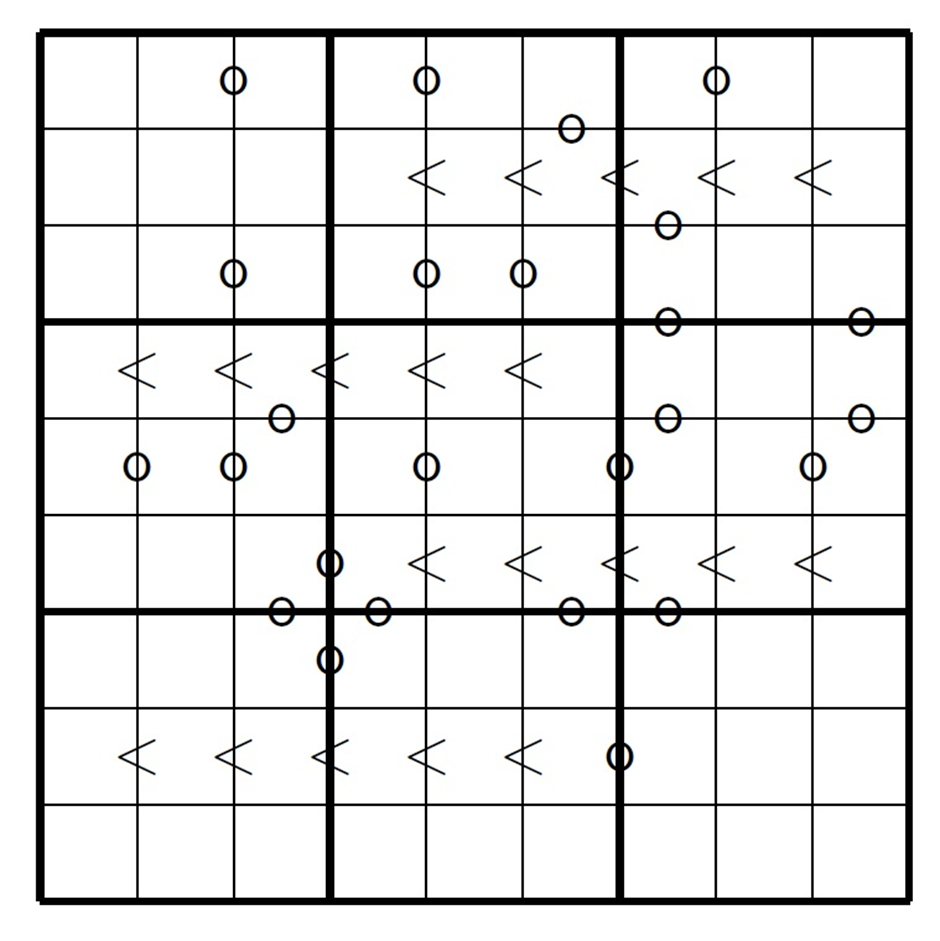                    
  Again the numbers 1 to 9 should be filled, in such a way that each number occurs exactly once in every row, every column and every 3x3 block. But now there are no numbers given, only symbols '<' and 'o'. The symbol '<' means that the number left from it should be less than the number right from it.
The symbol 'o' means that the two numbers on both sides are consecutive: they differ by exactly one. For border lines not containing a symbol '<' or 'o' nothing is known.
Just like normal sudoku this puzzle has a unique solution (as was figured out by SMT solving). The goal is to find it. Doing this by hand looks quite impossible (you may try!), but solving it by SMT is much more feasible. Can you do this?
As the answer you should give the 9 digit number formed by the lowest line.


In [1]:
!pip install z3-solver
from z3 import *

A = Function('A', IntSort(), IntSort(), IntSort())

constraints = []

for i in range(1, 10):
    for j in range(1, 10):
        constraints.append(A(i, j) > 0)
        constraints.append(A(i, j) < 10)

constraints.append(A(2, 4) < A(2, 5))
constraints.append(A(2, 5) < A(2, 6))
constraints.append(A(2, 6) < A(2, 7))
constraints.append(A(2, 7) < A(2, 8))
constraints.append(A(2, 8) < A(2, 9))
constraints.append(A(4, 1) < A(4, 2))
constraints.append(A(4, 2) < A(4, 3))
constraints.append(A(4, 3) < A(4, 4))
constraints.append(A(4, 4) < A(4, 5))
constraints.append(A(4, 5) < A(4, 6))
constraints.append(A(6, 4) < A(6, 5))
constraints.append(A(6, 5) < A(6, 6))
constraints.append(A(6, 6) < A(6, 7))
constraints.append(A(6, 7) < A(6, 8))
constraints.append(A(6, 8) < A(6, 9))
constraints.append(A(8, 1) < A(8, 2))
constraints.append(A(8, 2) < A(8, 3))
constraints.append(A(8, 3) < A(8, 4))
constraints.append(A(8, 4) < A(8, 5))
constraints.append(A(8, 5) < A(8, 6))
constraints.append((A(1,2)==A(1,3)+1) or (A(1,3)==A(1,2)+1))
constraints.append((A(1,4)==A(1,5)+1) or (A(1,5)==A(1,4)+1))
constraints.append((A(1,7)==A(1,8)+1) or (A(1,8)==A(1,7)+1))
constraints.append((A(1,6)==A(2,6)+1) or (A(2,6)==A(1,6)+1))
constraints.append((A(2,7)==A(3,7)+1) or (A(3,7)==A(2,7)+1))
constraints.append((A(3,2)==A(3,3)+1) or (A(3,3)==A(3,2)+1))
constraints.append((A(3,4)==A(3,5)+1) or (A(3,5)==A(3,4)+1))
constraints.append((A(3,5)==A(3,6)+1) or (A(3,6)==A(3,5)+1))
constraints.append((A(3,7)==A(4,7)+1) or (A(4,7)==A(3,7)+1))
constraints.append((A(3,9)==A(4,9)+1) or (A(4,9)==A(3,9)+1))
constraints.append((A(4,3)==A(5,3)+1) or (A(5,3)==A(4,3)+1))
constraints.append((A(4,7)==A(5,7)+1) or (A(5,7)==A(4,7)+1))
constraints.append((A(4,9)==A(5,9)+1) or (A(5,9)==A(4,9)+1))
constraints.append((A(5,1)==A(5,2)+1) or (A(5,2)==A(5,1)+1))
constraints.append((A(5,2)==A(5,3)+1) or (A(5,3)==A(5,2)+1))
constraints.append((A(5,4)==A(5,5)+1) or (A(5,5)==A(5,4)+1))
constraints.append((A(5,6)==A(5,7)+1) or (A(5,7)==A(5,6)+1))
constraints.append((A(5,8)==A(5,9)+1) or (A(5,9)==A(5,8)+1))
constraints.append((A(6,3)==A(6,4)+1) or (A(6,4)==A(6,3)+1))
constraints.append((A(6,3)==A(7,3)+1) or (A(7,3)==A(6,3)+1))
constraints.append((A(6,4)==A(7,4)+1) or (A(7,4)==A(6,4)+1))
constraints.append((A(6,6)==A(7,6)+1) or (A(7,6)==A(6,6)+1))
constraints.append((A(6,7)==A(7,7)+1) or (A(7,7)==A(6,7)+1))
constraints.append((A(7,3)==A(7,4)+1) or (A(7,4)==A(7,3)+1))
constraints.append((A(8,6)==A(8,7)+1) or (A(8,7)==A(8,6)+1))
for i in range(1, 10):
    for j in range(1, 10):
        for k in range(j + 1, 10):
            constraints.append(A(i, j) != A(i, k))
            constraints.append(A(j, i) != A(k, i))

solver = Solver()

solver.add(constraints)

if solver.check() == sat:
    print(solver.model())
else:
    print("Unsatisfiable")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 MB 6.8 MB/s eta 0:00:00
Unsatisfiable
